In [2]:
!pip install pandas
!pip install numpy
!pip install numpy


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install matplotlib.pyplot
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns


In [12]:
df = pd.read_csv('cian_parsing_result_sale_1_100_moskva_18_Nov_2023_23_04_31_527788.csv', sep=';')
df.head()

,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price,district,street,house_number,underground,residential_complex
0,ANT Development,developer,https://www.cian.ru/sale/flat/291563636/,Москва,sale,flat,28,34,2,51.2,954271,48858726,Дорогомилово,Поклонная,9,Парк Победы,Поклонная 9
1,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/291778742/,Москва,sale,flat,37,37,-1,135.3,923872,125000000,Хорошевский,Ленинградский проспект,37/6,Аэропорт,Прайм Парк
2,ANT Development,developer,https://www.cian.ru/sale/flat/283856103/,Москва,sale,flat,10,34,3,86.8,1177508,102207781,Дорогомилово,Поклонная,9,Парк Победы,Поклонная 9
3,LaRichesse,real_estate_agent,https://www.cian.ru/sale/flat/281332469/,Москва,sale,flat,5,6,3,111.0,608018,67490000,Беговой,3-я Ямского Поля,9,Белорусская,Art Residence
4,ANT Development,developer,https://www.cian.ru/sale/flat/291385930/,Москва,sale,flat,26,34,4,134.1,966340,129586246,Дорогомилово,Поклонная,9,Парк Победы,Поклонная 9


In [24]:
df.isnull().sum()

author                 0
author_type            0
link                   0
city                   0
deal_type              0
accommodation_type     0
floor                  0
floors_count           0
rooms_count            0
total_meters           0
price_per_m2           0
price                  0
district               0
street                 0
house_number           0
underground            0
residential_complex    0
dtype: int64

In [22]:
df = df.dropna(subset=('residential_complex', 'house_number', 'district', 'street', 'underground'))

In [23]:
df.isna().sum()

author                 0
author_type            0
link                   0
city                   0
deal_type              0
accommodation_type     0
floor                  0
floors_count           0
rooms_count            0
total_meters           0
price_per_m2           0
price                  0
district               0
street                 0
house_number           0
underground            0
residential_complex    0
dtype: int64

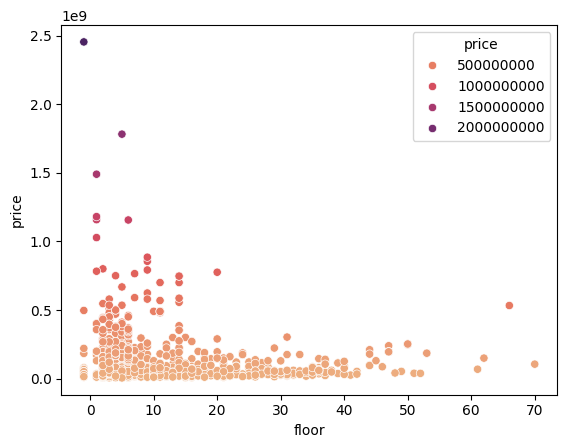

In [26]:
sns.scatterplot(data=df, x="floor", y="price", hue='price', palette='flare')
plt.title('')
plt.show()

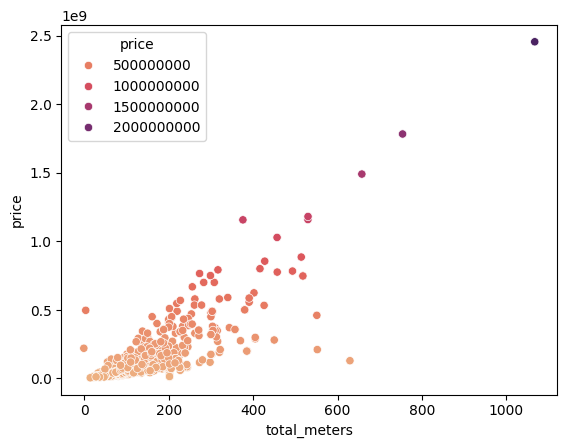

In [34]:
sns.scatterplot(data=df, x="total_meters", y="price", hue='price', palette='flare')
plt.show()

C:\Users\vadim\AppData\Local\Temp\ipykernel_21148\4258146650.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=out, x=out.values(), y=out.keys(), palette='flare')


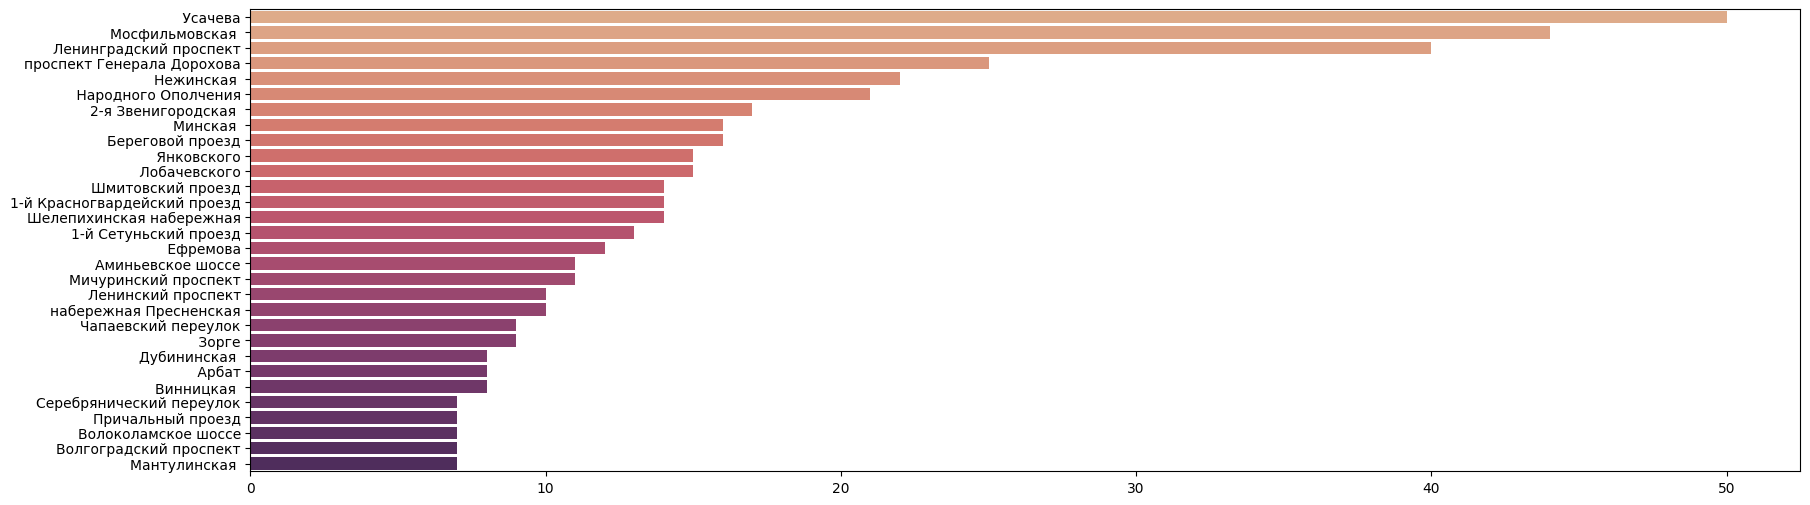

In [73]:
from collections import Counter
from itertools import islice

location_count = Counter(df['street'])
out = Counter()
location_count = dict(location_count.most_common(30))
out.update(dict(islice(location_count.items(), 30)))
plt.figure(figsize=(20,6))
sns.barplot(data=out, x=out.values(), y=out.keys(), palette='flare')
plt.show()

In [74]:
!pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 39.0 MB/s eta 0:00:00
     ---------------------------------------- 22.9/22.9 MB 5.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
import geopandas as gpd

In [ ]:
geodata = gpd.read_file('central-fed-district-latest.osm.pbf')